# scikit-learn-k-means

- K Means Algorithm

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## PCA (Principal Component Analysis)

## Introduction to PCA
Principal Component Analysis (PCA) is a statistical technique used in machine learning and data science for dimensionality reduction while preserving as much variance as possible. It's particularly useful in processing and visualizing high-dimensional data, simplifying complexities while maintaining trends and patterns.

## How PCA Works
PCA transforms a large set of variables into a smaller one that still contains most of the information in the large set. The idea is to reduce the dimensionality of the data by finding a new set of variables, fewer in number, without sacrificing too much information. These new variables are called principal components (PCs).

1. Standardization: Typically, the first step in PCA is to standardize the data so that each feature contributes equally.
2. Covariance Matrix Computation: Calculate the covariance matrix to understand how the variables in the input data relate.
3. Compute Eigenvalues and Eigenvectors: These are extracted from the covariance matrix; eigenvectors determine the directions of the new feature space, and eigenvalues determine their magnitude. In other words, the eigenvectors point in the direction of the largest variance of the data, where the eigenvalues define their magnitude.
4. Sort Eigenvectors by Eigenvalues: The eigenvectors are sorted by decreasing eigenvalues to rank the corresponding axes of maximum variance in the data.
5. Project Data Onto Principal Components: The original data can now be projected onto these principal axes to reduce the dimensions of the data with minimum information loss.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Choosing the Number of Components
To decide how many components to keep, you can look at the cumulative explained variance ratio as a function of the number of components:

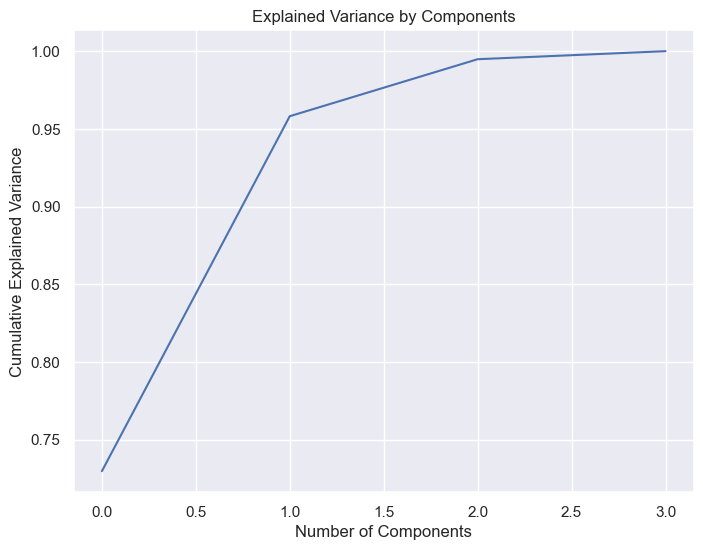

In [13]:
pca = PCA().fit(X_scaled)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()

This plot helps you understand how many components are needed to capture most of the variance in the data. You typically select the smallest number of components that add up to a significant portion (like 95%) of the variance.

### Dimensionality Reduction by applying PCA with 2 Principal Components

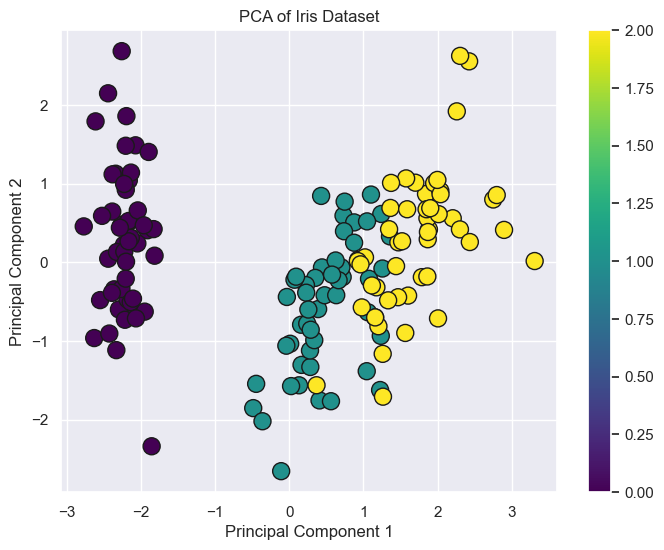

In [14]:
# Apply PCA
pca = PCA(n_components=2)  # reduce dimensions to 2 for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA-transformed version of the Iris dataset
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=150)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(scatter)
plt.show()

### What would have happened with 1 Principal Component?

- Significant Dimensionality Reduction - Maximal Variance in One Dimension: By selecting only one principal component, PCA will transform the data into a single dimension that captures the direction along which the variance of the data is maximized. This is essentially projecting all data points onto the first principal component, reducing the dataset from a four-dimensional space to a one-dimensional space.
- Explained Variance: The first principal component will not capture 100% of the variance in the data. The amount of variance it does capture depends on the structure of the dataset. In the case of the Iris dataset, the first principal component typically captures around 72-75% of the variance. This means about a quarter of the data's information (related to variance) is lost.

Explained variance ratio: [0.72962445]


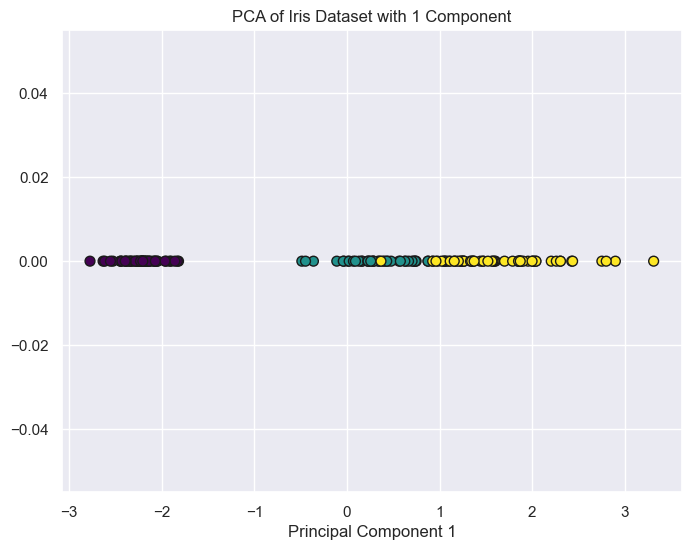

In [19]:
# Apply PCA with one component
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Plot the PCA-transformed version of the Iris dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.title('PCA of Iris Dataset with 1 Component')
plt.show()


### What would have happened with 3 Principal Component?

- Dimensionality Reduction and Variance Retention - Reduction in Dimensions with High Variance Retention: By choosing three principal components, you effectively reduce the data's dimensionality from four to three. This still simplifies the data but retains a large part of its variability. Typically, for the Iris dataset, the first three components might capture more than 95% of the total variance, depending on the exact data scaling and PCA calculation specifics. This means most of the information is preserved while still reducing the complexity of the data.
- 3D Visualization: Although three-dimensional plots are less intuitive and harder to interpret than 2D plots, they offer a richer representation of the dataset's structure than 2D plots. This allows for potentially better understanding and separation of the data clusters if they exist.
- Enhanced Feature Engineering: With three components, you're in a better position to engineer new features that maintain essential characteristics of the original data, possibly leading to improved model performance if these components are used as inputs to further machine learning models.

Explained variance ratio: [0.72962445 0.22850762 0.03668922]
Cumulative explained variance: [0.72962445 0.95813207 0.99482129]


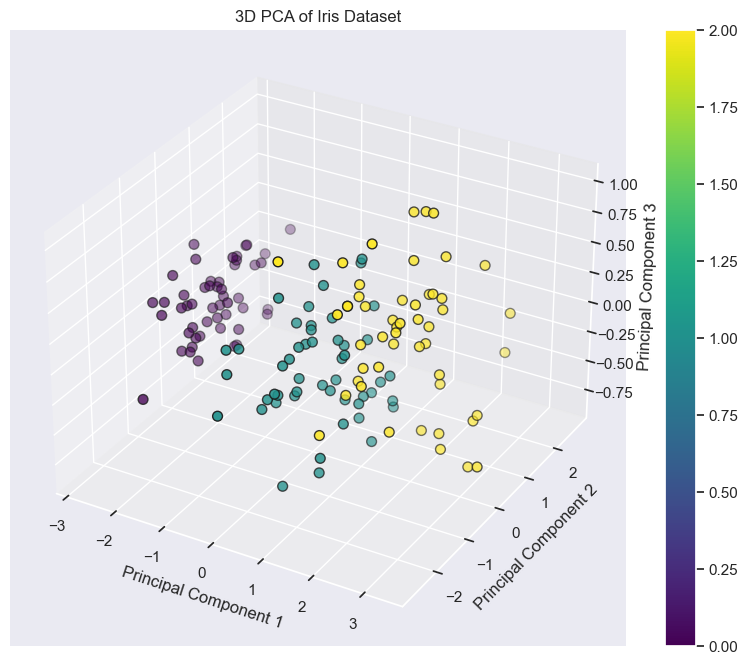

In [20]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with three components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))

# Plot the PCA-transformed version of the Iris dataset in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA of Iris Dataset')
plt.colorbar(scatter)
plt.show()


### What would have happened with 4 Principal Components?
If you choose to use four components for Principal Component Analysis (PCA) on a dataset like the Iris dataset, which originally has four features, several outcomes and implications arise:

- Full Dimension Retention - No Dimension Reduction: The Iris dataset has four features, so selecting four components in PCA means you are retaining all the original dimensions. Essentially, you are not reducing the dimensionality of the data. The PCA will transform these four dimensions into a new set of four orthogonal dimensions (principal components), but all the original information (100% of the variance) is retained.

In [21]:
# Apply PCA with four components
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", np.cumsum(pca.explained_variance_ratio_))


Explained variance ratio: [0.72962445 0.22850762 0.03668922 0.00517871]
Cumulative explained variance: [0.72962445 0.95813207 0.99482129 1.        ]


## K-Means Clustering

K Means is an algorithm for **unsupervised clustering**: that is, finding clusters in data based on the data attributes alone (not the labels).

K Means is a relatively easy-to-understand algorithm.  It searches for cluster centers which are the mean of the points within them, such that every point is closest to the cluster center it is assigned to.

Step-by-step Explanation:
1. Standardization: It's generally a good idea to standardize your data before applying PCA since PCA is sensitive to the variances of the initial variables.
2. Silhouette Index:  For determining the optimal number of clusters in k-means clustering
3. PCA Application: PCA is applied to reduce the dimensions to two principal components, making it easier to visualize the clustering in a two-dimensional space.
4. K-Means Clustering: The clustering is performed on the PCA-reduced dataset.
Visualization: The clusters and their centroids are visualized using a scatter plot. The centroids provide a visual representation of the "center" of each cluster.

Let's look at how KMeans operates on the simple clusters we looked at previously.

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### How the Silhouette Score Works
The Silhouette Score for each point is a measure of how similar that point is to points in its own cluster versus points in other clusters, and it ranges from -1 to +1:

A score close to +1 indicates that the point is well inside its own cluster and far from other clusters.
A score close to 0 indicates that the point is close to a cluster boundary.
A score close to -1 indicates that the point may be in the wrong cluster.
The overall average Silhouette Score of all points can be used as a metric to judge the quality of the clustering.

C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808
For n_clusters = 3 The average silhouette_score is : 0.4565352255831263
For n_clusters = 4 The average silhouette_score is : 0.3850454053045392
For n_clusters = 5 The average silhouette_score is : 0.34380827431664635
For n_clusters = 6 The average silhouette_score is : 0.2982123214238712
For n_clusters = 7 The average silhouette_score is : 0.32989167897875243
For n_clusters = 8 The average silhouette_score is : 0.31220121985928495
For n_clusters = 9 The average silhouette_score is : 0.33140039405179283
For n_clusters = 10 The average silhouette_score is : 0.33925430677602253


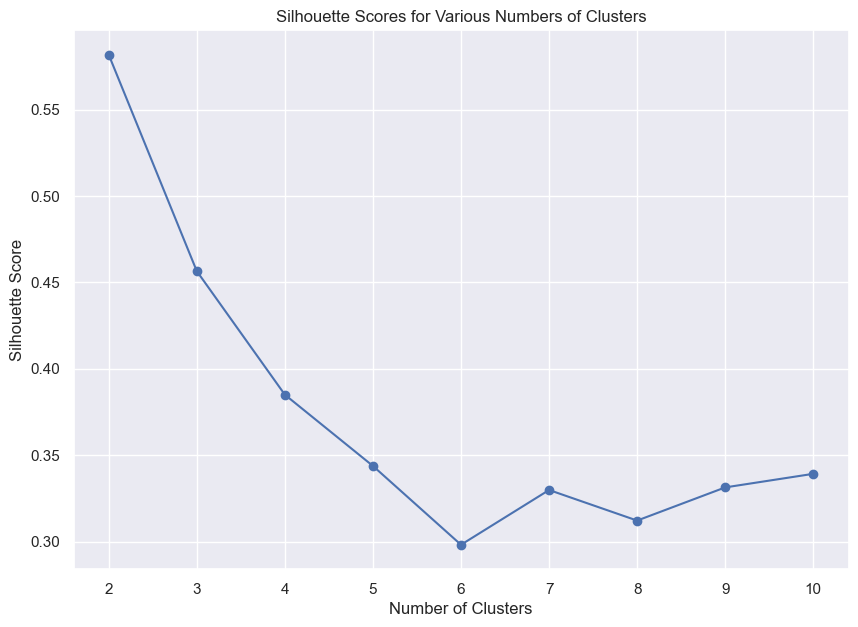

In [36]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
range_n_clusters = list(range(2, 11))  # Silhouette Score cannot be calculated for n_clusters=1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)
    
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

# Plotting silhouette scores
plt.figure(figsize=(10, 7))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xticks(range_n_clusters)
plt.show()

C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


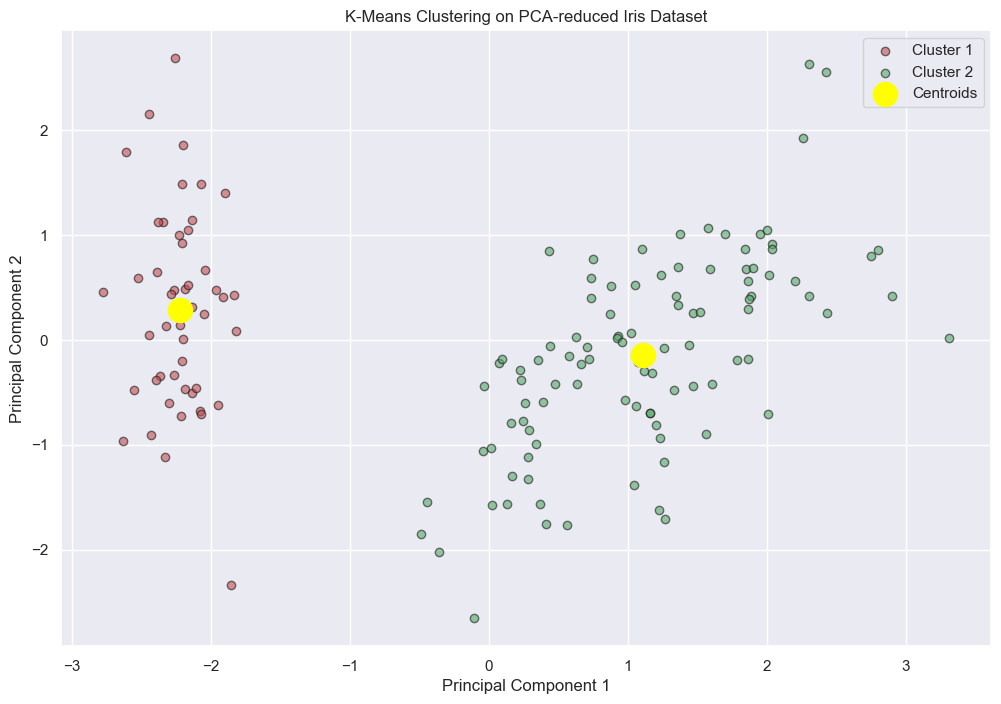

In [46]:

# Applying PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Select the optimal k from the elbow plot, let's assume it's 3 from observation
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_pca)

# Get cluster assignment labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the results in 2D:
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b']
for i in range(k_optimal):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], color=colors[i], label=f'Cluster {i+1}', alpha=0.6, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-reduced Iris Dataset')
plt.legend()
plt.show()


C:\Users\Mahnoor\anaconda3\envs\env3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


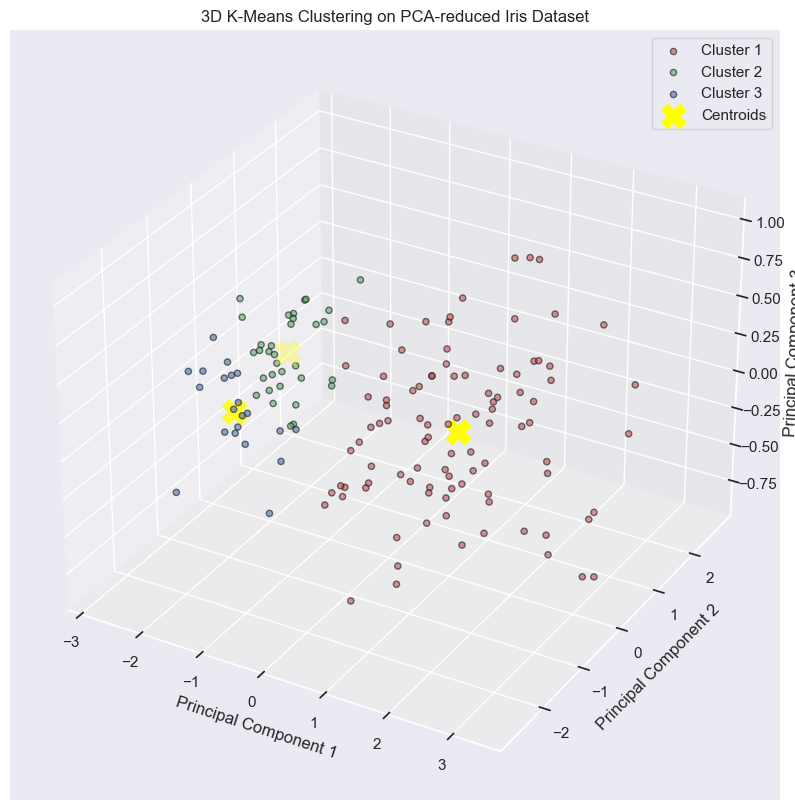

In [47]:
# Applying PCA to reduce dimensions to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Select the optimal k from previous analysis, let's assume it's 3
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_pca)

# Get cluster assignment labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the results in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b']
for i in range(k_optimal):
    ax.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], X_pca[labels == i, 2], 
               color=colors[i], label=f'Cluster {i+1}', alpha=0.6, edgecolor='k')

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           s=300, c='yellow', label='Centroids', marker='X')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D K-Means Clustering on PCA-reduced Iris Dataset')
plt.legend()
plt.show()

### KMeans Caveats

* The convergence of this algorithm is not guaranteed; for that reason, by default scikit-learn uses a large number of random initializations and finds the best results.

* The number of clusters must be set beforehand.  There are other clustering algorithms for which this requirement may be lifted.